## Проектная работа

### Описание проекта

Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях;
* выгрузка их покупок за этот период;
* рекламные расходы.

Предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупаются;
* какие факторы мешают привлечению клиентов.

### Описание данных

В распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
* User Id — уникальный идентификатор пользователя;
* Region — страна пользователя;
* Device — тип устройства пользователя;
* Channel — идентификатор источника перехода;
* Session Start — дата и время начала сессии;
* Session End — дата и время окончания сессии.

Структура `orders_info_short.csv`:
* User Id — уникальный идентификатор пользователя;
* Event Dt — дата и время покупки;
* Revenue — сумма заказа;

Структура `costs_info_short.csv`:
* dt — дата проведения рекламной кампании;
* Channel — идентификатор рекламного источника;
* costs — расходы на эту кампанию.

### Загрузка данных и подготовка их к анализу

Импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

Выведем первые 5 строк датафрейма `visits` на экран.

In [3]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Приведём к нижнему регистру названия столбцов таблицы `visits`.

In [4]:
visits.columns = visits.columns.str.lower()

Переименуем столбцы `user id`, `session start` и `session end`, приведя их к змеиному регистру. Для этого заменим все пробелы нижними подчеркиваниями.

In [5]:
visits.columns = visits.columns.str.replace(' ', '_')

Посмотрим как изменились названия столбцов фрейма `visits`.

In [6]:
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Названия изменились так, как это было запланировано.

Выведем общую информацию о датафрейме `visits`. 

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Типы данных во всех столбцах кроме `session_start` и `session_end` приемлемы для дальнейшей работы.

Поменяем тип данных в столбцах `session_start` и `session_end` на datetime для возможности последующей работы с датой и временем .

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Проверим, изменились ли типы данных.

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Типы данных в столбцах `session_start` и `session_end` изменились на datetime, как и было нужно.

Проверим столбцы таблицы `visits` на пропуски.

In [10]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Пропусков в столбцах этой таблицы нет.

Посчитаем количество строк-дубликатов в фрейме `visits`.

In [11]:
visits.duplicated().sum()

0

Строки-дубликаты в этом фрейме отсутствуют.

**Итак, датафрейм `visits` подготовлен к дальнейшей работе. Были изменены названия столбцов и типы данных в столбцах, содержащих время и дату. Пропусков и дубликатов в датафрейме не было обнаружено.**

Перейдем к следующему датафрейму `-` `orders`. Выведем его первые пять строк на экран.

In [12]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Приведём к нижнему регистру названия столбцов таблицы `orders`.

In [13]:
orders.columns = orders.columns.str.lower()

Переименуем столбцы `user id` и `event dt`, приведя их к змеиному регистру. Для этого заменим все пробелы нижними подчеркиваниями.

In [14]:
orders.columns = orders.columns.str.replace(' ', '_')

Посмотрим как изменились названия столбцов фрейма `orders`.

In [15]:
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Названия изменились так, как это было запланировано.

Выведем общую информацию о датафрейме `orders`. 

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Типы данных во всех столбцах кроме `event_dt` приемлемы для дальнейшей работы.

Поменяем тип данных в столбце `event_dt` на datetime для возможности последующей работы с датой и временем.

In [17]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Проверим, изменился ли тип данных.

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Тип данных в столбце `event_dt` изменился на datetime, как и было нужно.

Проверим столбцы таблицы `orders` на пропуски.

In [19]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

Пропусков в столбцах этой таблицы нет.

Посчитаем количество строк-дубликатов в фрейме `orders`.

In [20]:
orders.duplicated().sum()

0

Строки-дубликаты в этом фрейме отсутствуют.

Проверим, всё ли в порядке с суммами заказов. Для этого узнаем на какие суммы были заказы и сколько таких заказов было. 

In [21]:
orders.groupby('revenue')['user_id'].agg('count')

revenue
4.99     38631
5.99       780
9.99       385
19.99      204
49.99      212
Name: user_id, dtype: int64

С суммами заказов все в порядке. Происходили заказы на 5, 6, 10 ,20 и 50 долларов.

**Итак, датафрейм `orders` подготовлен к дальнейшей работе. Были изменены названия столбцов и тип данных в столбце, который содержит дату и время. Пропусков и дубликатов в датафрейме не было обнаружено. Со значениями в столбце с суммой заказа всё в порядке.**

Перейдем к датафрейму `-` `costs`. Выведем его первые пять строк на экран.

In [22]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Приведём к нижнему регистру названия столбцов таблицы `costs`.

In [23]:
costs.columns = costs.columns.str.lower()

Посмотрим как изменились названия столбцов фрейма `costs`.

In [24]:
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Название столбца с идентификатором рекламного источника приведено к нижнему регистру.

Выведем общую информацию о датафрейме `costs`. 

In [25]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Типы данных во всех столбцах кроме `dt` приемлемы для дальнейшей работы.

Поменяем тип данных в столбце `dt` на datetime для возможности последующей работы с датой.

In [26]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим столбцы таблицы `costs` на пропуски.

In [27]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропусков в столбцах этой таблицы нет.

Посчитаем количество строк-дубликатов в фрейме `costs`.

In [28]:
costs.duplicated().sum()

0

Строки-дубликаты в этом фрейме отсутствуют.

Проверим, всё ли в порядке с расходами на рекламу. Для этого построим гистограмму и посмотрим на распределение этой величины.

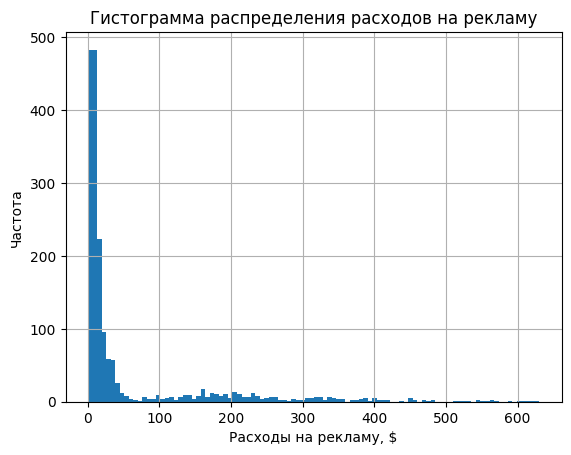

In [29]:
fig1 = costs.plot.hist('costs',bins=100,legend=False,grid=True);
fig1.set(xlabel='Расходы на рекламу, $', ylabel='Частота',title='Гистограмма распределения расходов на рекламу');

С распределением расходов все в порядке. В среднем реклама стоит не дорого. Но есть и случаи с дорогой рекламой по 100 $ и выше. 

Посмотрим на распределение расходов в другом масштабе.

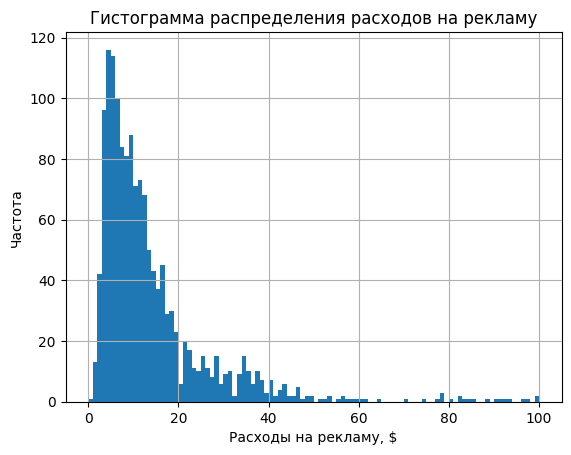

In [30]:
fig2 = costs.plot.hist('costs',bins=100,legend=False,grid=True,range=(0,100));
fig2.set(xlabel='Расходы на рекламу, $', ylabel='Частота',title='Гистограмма распределения расходов на рекламу');

Чаще всего реклама стоила не больше 60 $.

**Итак, датафрейм `costs` подготовлен к дальнейшей работе. Было изменено название одного столбца и тип данных в столбце, который содержит дату. Пропусков и дубликатов в датафрейме не было обнаружено. Со значениями в столбце с расходами на рекламу всё в порядке.**

### Определение функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функцию для создания профилей пользователей.

In [31]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(
        0
    )
    
    return profiles  # возвращаем профили с CAC

Зададим функцию для расчёта LTV и ROI.

In [32]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Зададим функцию для сглаживания по методу скользящего среднего.

In [33]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Зададим функцию для визуализации LTV, CAC и ROI.

In [34]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Зададим функцию для расчёта коэффициента удержания.

In [35]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

Зададим функцию для построения графика удержания.

In [36]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Зададим функцию для расчёта конверсии.

In [37]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Зададим функцию для построения графика конверсии.

In [38]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Составим профили пользователей. Для этого вызовем функцию `get_profiles()` и передадим ей исходные данные о пользователях. 

In [39]:
profiles = get_profiles(sessions=visits,
                        orders=orders,
                        events=None,
                        ad_costs=costs)

Выведем на экран первые 5 строк таблицы `profiles`, содержащей информацию о профилях пользователей.

In [40]:
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей.

In [41]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

In [42]:
min_date, max_date

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

Итак, минимальная дата привлечения пользователей `-` 1 мая 2019 года, а максимальная `-` 27 октября 2019 года. 

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

Создадим таблицу с количеством пользователей для каждой из стран.

In [43]:
number_of_users = (
    profiles
    .groupby('region')['user_id']
    .agg('nunique')
    .reset_index()
    .rename(columns={'user_id': 'n_users'})
)                 

Создадим таблицу с долей платящих пользователей в процентах для каждой из стран.

In [44]:
payer_rate = (
    profiles
    .groupby('region')['payer']
    .agg('mean')
    .reset_index()
    .rename(columns={'payer': 'pay_rate, %'})
)    
payer_rate['pay_rate, %'] *= 100

Объединим созданные таблицы по странам и отсортируем полученную таблицу по убыванию доли платящих пользователей.

In [45]:
result_table = (
    number_of_users
    .merge(payer_rate,on='region')
    .rename(columns={'region': 'Страна', 'n_users': 'Число пользователей', 'pay_rate, %': 'Доля платящих, %'})
    .sort_values('Доля платящих, %',ascending=False)
    .reset_index(drop=True)
)

Выведем таблицу, отражающую количество пользователей и долю платящих из каждой страны, на экран.

In [46]:
result_table

Страна  Число пользователей  Доля платящих, %
0  United States               100002          6.901862
1        Germany                14981          4.111875
2             UK                17575          3.982930
3         France                17450          3.799427

**Доля платящих пользователей в США наибольшая. В остальных странах (Великобритании, Франции и Германии) доля платящих ниже и для них она почти не отличается. Число пользователей во всех странах велико, поэтому доля платящих статистически правильно отражает стремление к покупкам у пользователей.**

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

Создадим таблицу с количеством пользователей для каждого из устройств.

In [47]:
number_of_users = (
    profiles
    .groupby('device')['user_id']
    .agg('nunique')
    .reset_index()
    .rename(columns={'user_id': 'n_users'})
) 

Создадим таблицу с долей платящих пользователей в процентах для каждого из устройств.

In [48]:
payer_rate = (
    profiles
    .groupby('device')['payer']
    .agg('mean')
    .reset_index()
    .rename(columns={'payer': 'pay_rate, %'})
)    
payer_rate['pay_rate, %'] *= 100

Объединим созданные таблицы по устройствам и отсортируем полученную таблицу по убыванию доли платящих пользователей.

In [49]:
result_table = (
    number_of_users
    .merge(payer_rate,on='device')
    .rename(columns={'device': 'Устройство', 'n_users': 'Число пользователей', 'pay_rate, %': 'Доля платящих, %'})
    .sort_values('Доля платящих, %',ascending=False)
    .reset_index(drop=True)
)

Выведем таблицу, отражающую количество пользователей и долю платящих для каждого устройства, на экран.

In [50]:
result_table

Устройство  Число пользователей  Доля платящих, %
0        Mac                30042          6.364423
1     iPhone                54479          6.207897
2    Android                35032          5.851793
3         PC                30455          5.046790

**Платящие пользователи предпочитают устройства `iPhone` и `Mac`, ведь доля платящих на большой выборке пользователей оказалась для этих устройств наибольшей. Доля платящих пользователей `Android` близка к доле платящих пользователей `iPhone` и `Mac`, но все же меньше. Самая низкая доля платящих у пользователей персональных компьютеров.**

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

Создадим таблицу с количеством пользователей для каждого из каналов.

In [51]:
number_of_users = (
    profiles
    .groupby('channel')['user_id']
    .agg('nunique')
    .reset_index()
    .rename(columns={'user_id': 'n_users'})
) 

Создадим таблицу с долей платящих пользователей в процентах для каждого из каналов.

In [52]:
payer_rate = (
    profiles
    .groupby('channel')['payer']
    .agg('mean')
    .reset_index()
    .rename(columns={'payer': 'pay_rate, %'})
)    
payer_rate['pay_rate, %'] *= 100

Объединим созданные таблицы по каналам и отсортируем полученную таблицу по убыванию доли платящих пользователей.

In [53]:
result_table = (
    number_of_users
    .merge(payer_rate,on='channel')
    .rename(columns={'channel': 'Канал', 'n_users': 'Число пользователей', 'pay_rate, %': 'Доля платящих, %'})
    .sort_values('Доля платящих, %',ascending=False)
    .reset_index(drop=True)
)

Выведем таблицу, отражающую количество пользователей и долю платящих для каждого канала, на экран.

In [54]:
result_table

Канал  Число пользователей  Доля платящих, %
0             FaceBoom                29144         12.204914
1           AdNonSense                 3880         11.340206
2       lambdaMediaAds                 2149         10.469986
3               TipTop                19561          9.600736
4       RocketSuperAds                 4448          7.913669
5       WahooNetBanner                 8553          5.296387
6              YRabbit                 4312          3.826531
7         MediaTornado                 4364          3.574702
8              LeapBob                 8553          3.063253
9   OppleCreativeMedia                 8605          2.707728
10             organic                56439          2.055316

**Каналы `FaceBoom`, `AdNonSense`, `lambdaMediaAds` и `TipTop` привлекли пользователей с наибольшей долей платящих. Наименьшая доля платящих у пользователей, привлечённых каналами `YRabbit`, `MediaTornado`, `LeapBob` и `OppleCreativeMedia`. Промежуточное место по доле платящих занимают каналы `WahooNetBanner` и `RocketSuperAds`. Пользователи, заинтересовавшиеся приложением без рекламы, конвертируются в платящих хуже всего, что ожидаемо.**

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Посчитаем общую сумму расходов на маркетинг.

In [55]:
int(costs['costs'].sum())

105497

Общая сумма расходов на маркетинг составила приблизительно 105,5 тысяч долларов.

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [56]:
(costs
 .groupby('channel')['costs']
 .agg('sum')
 .reset_index()
 .rename(columns={'channel':'Канал','costs':'Сумма, $'})
 .sort_values(by='Сумма, $',ascending=False)
 .reset_index(drop=True)
)

Канал  Сумма, $
0              TipTop  54751.30
1            FaceBoom  32445.60
2      WahooNetBanner   5151.00
3          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6             LeapBob   1797.60
7      lambdaMediaAds   1557.60
8        MediaTornado    954.48
9             YRabbit    944.22

**На рекламные источники `TipTop` и `FaceBoom` было потрачено больше всего денег, а на источники `MediaTornado` и `YRabbit` меньше всего.**

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

Начнем с динамики по неделям.

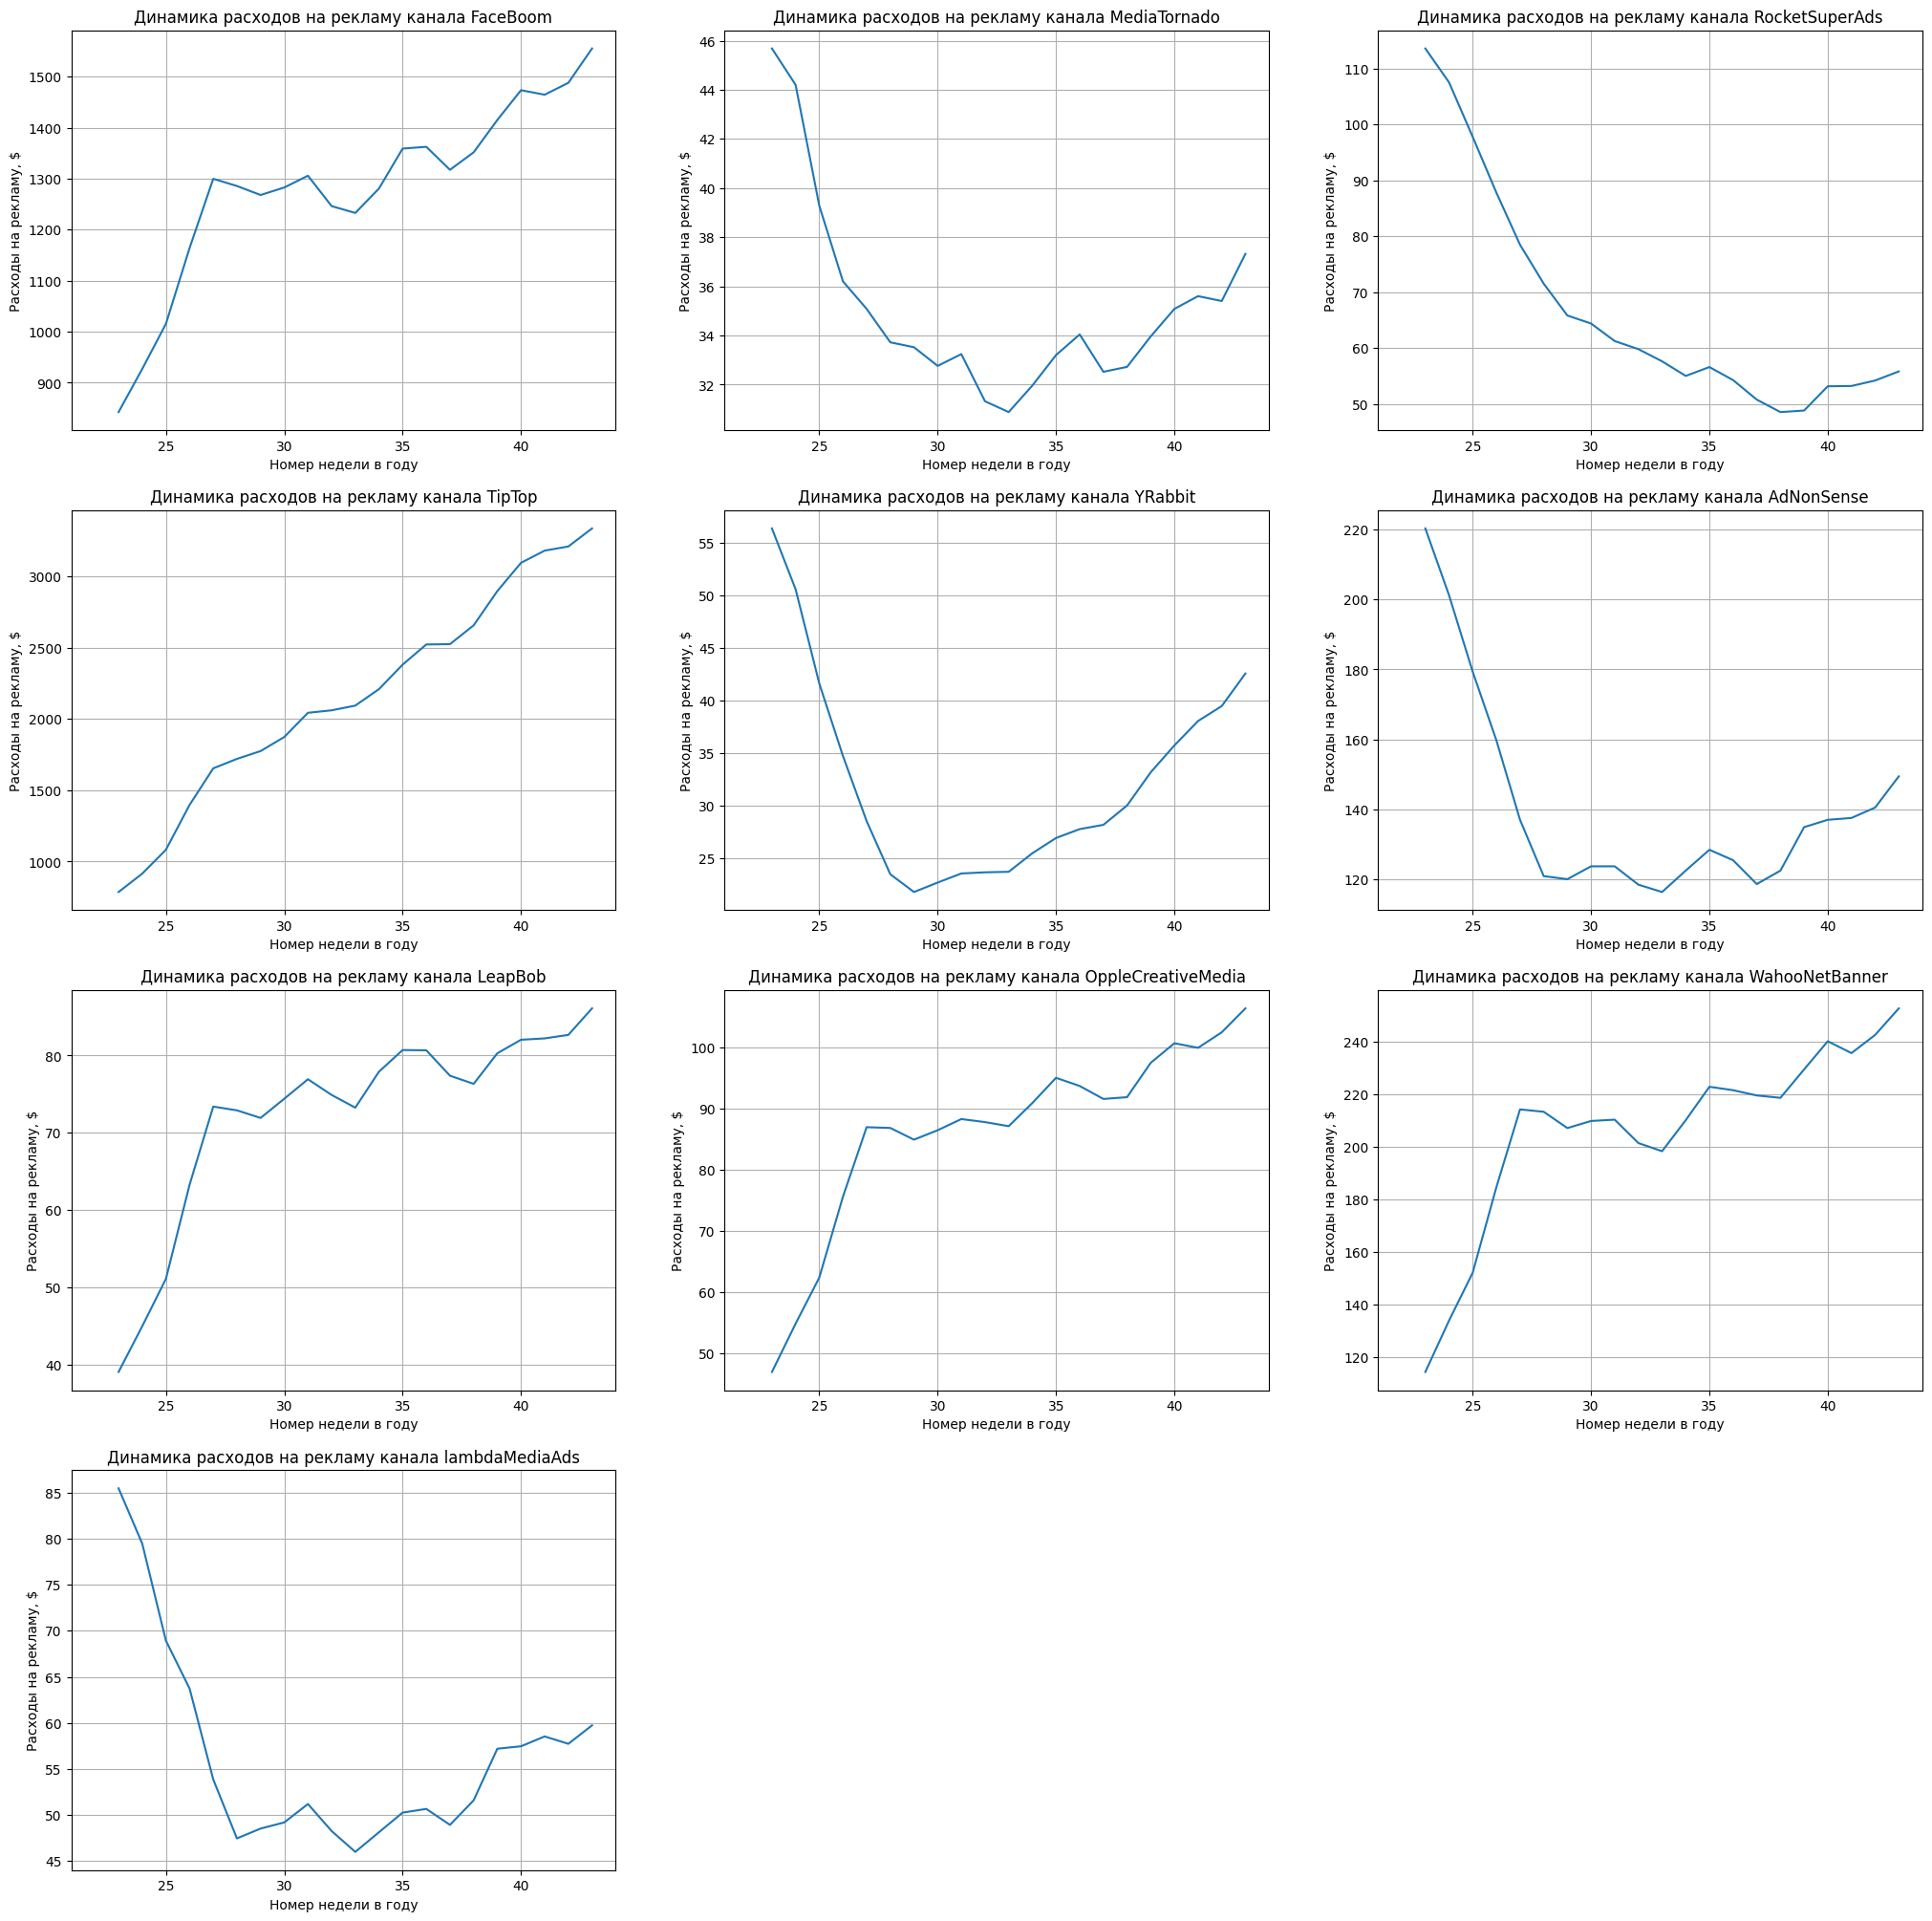

In [57]:
j = 0
plt.figure(figsize=(25, 25))
for channel_name in costs['channel'].unique():
    costs_history = (costs[costs['channel'] == channel_name]
                     [['dt','costs']]
                    )
    costs_history['dt'] = pd.to_datetime(costs_history['dt']) 
    costs_history['dt'] = costs_history['dt'].dt.isocalendar().week
    costs_history = costs_history.groupby('dt')['costs'].sum().reset_index()
    costs_history['costs'] = costs_history['costs'].rolling(6).mean()
    j = j + 1
    ax_j = plt.subplot(4, 3, j)
    figure = costs_history.plot(x='dt',y='costs',grid=True,legend=False,ax=ax_j,xlim=(21,44));
    figure.set(xlabel='Номер недели в году',
               ylabel='Расходы на рекламу, $',
               title='Динамика расходов на рекламу канала {}'.format(channel_name));    

**Каналы можно разделить на 2 группы по характеру динамики изменения расходов на рекламу по неделям:**
* **1 группа `-` с монотонной тенденцией на увеличение расходов. В неё входят каналы:**
  * **TipTop;**
  * **FaceBoom;**
  * **LeapBob;**
  * **OppleCreativeMedia;**
  * **WahooNetBanner.**
* **2 группа `-` с немонотонной тенденцией (сначала уменьшение, а потом увеличение расходов). В неё входят каналы:** 
  * **MediaTornado;**
  * **YRabbit;**
  * **lambdaMediaAds;**
  * **RocketSuperAds;**
  * **AdNonSense.**


Теперь перейдем к динамике по месяцам.

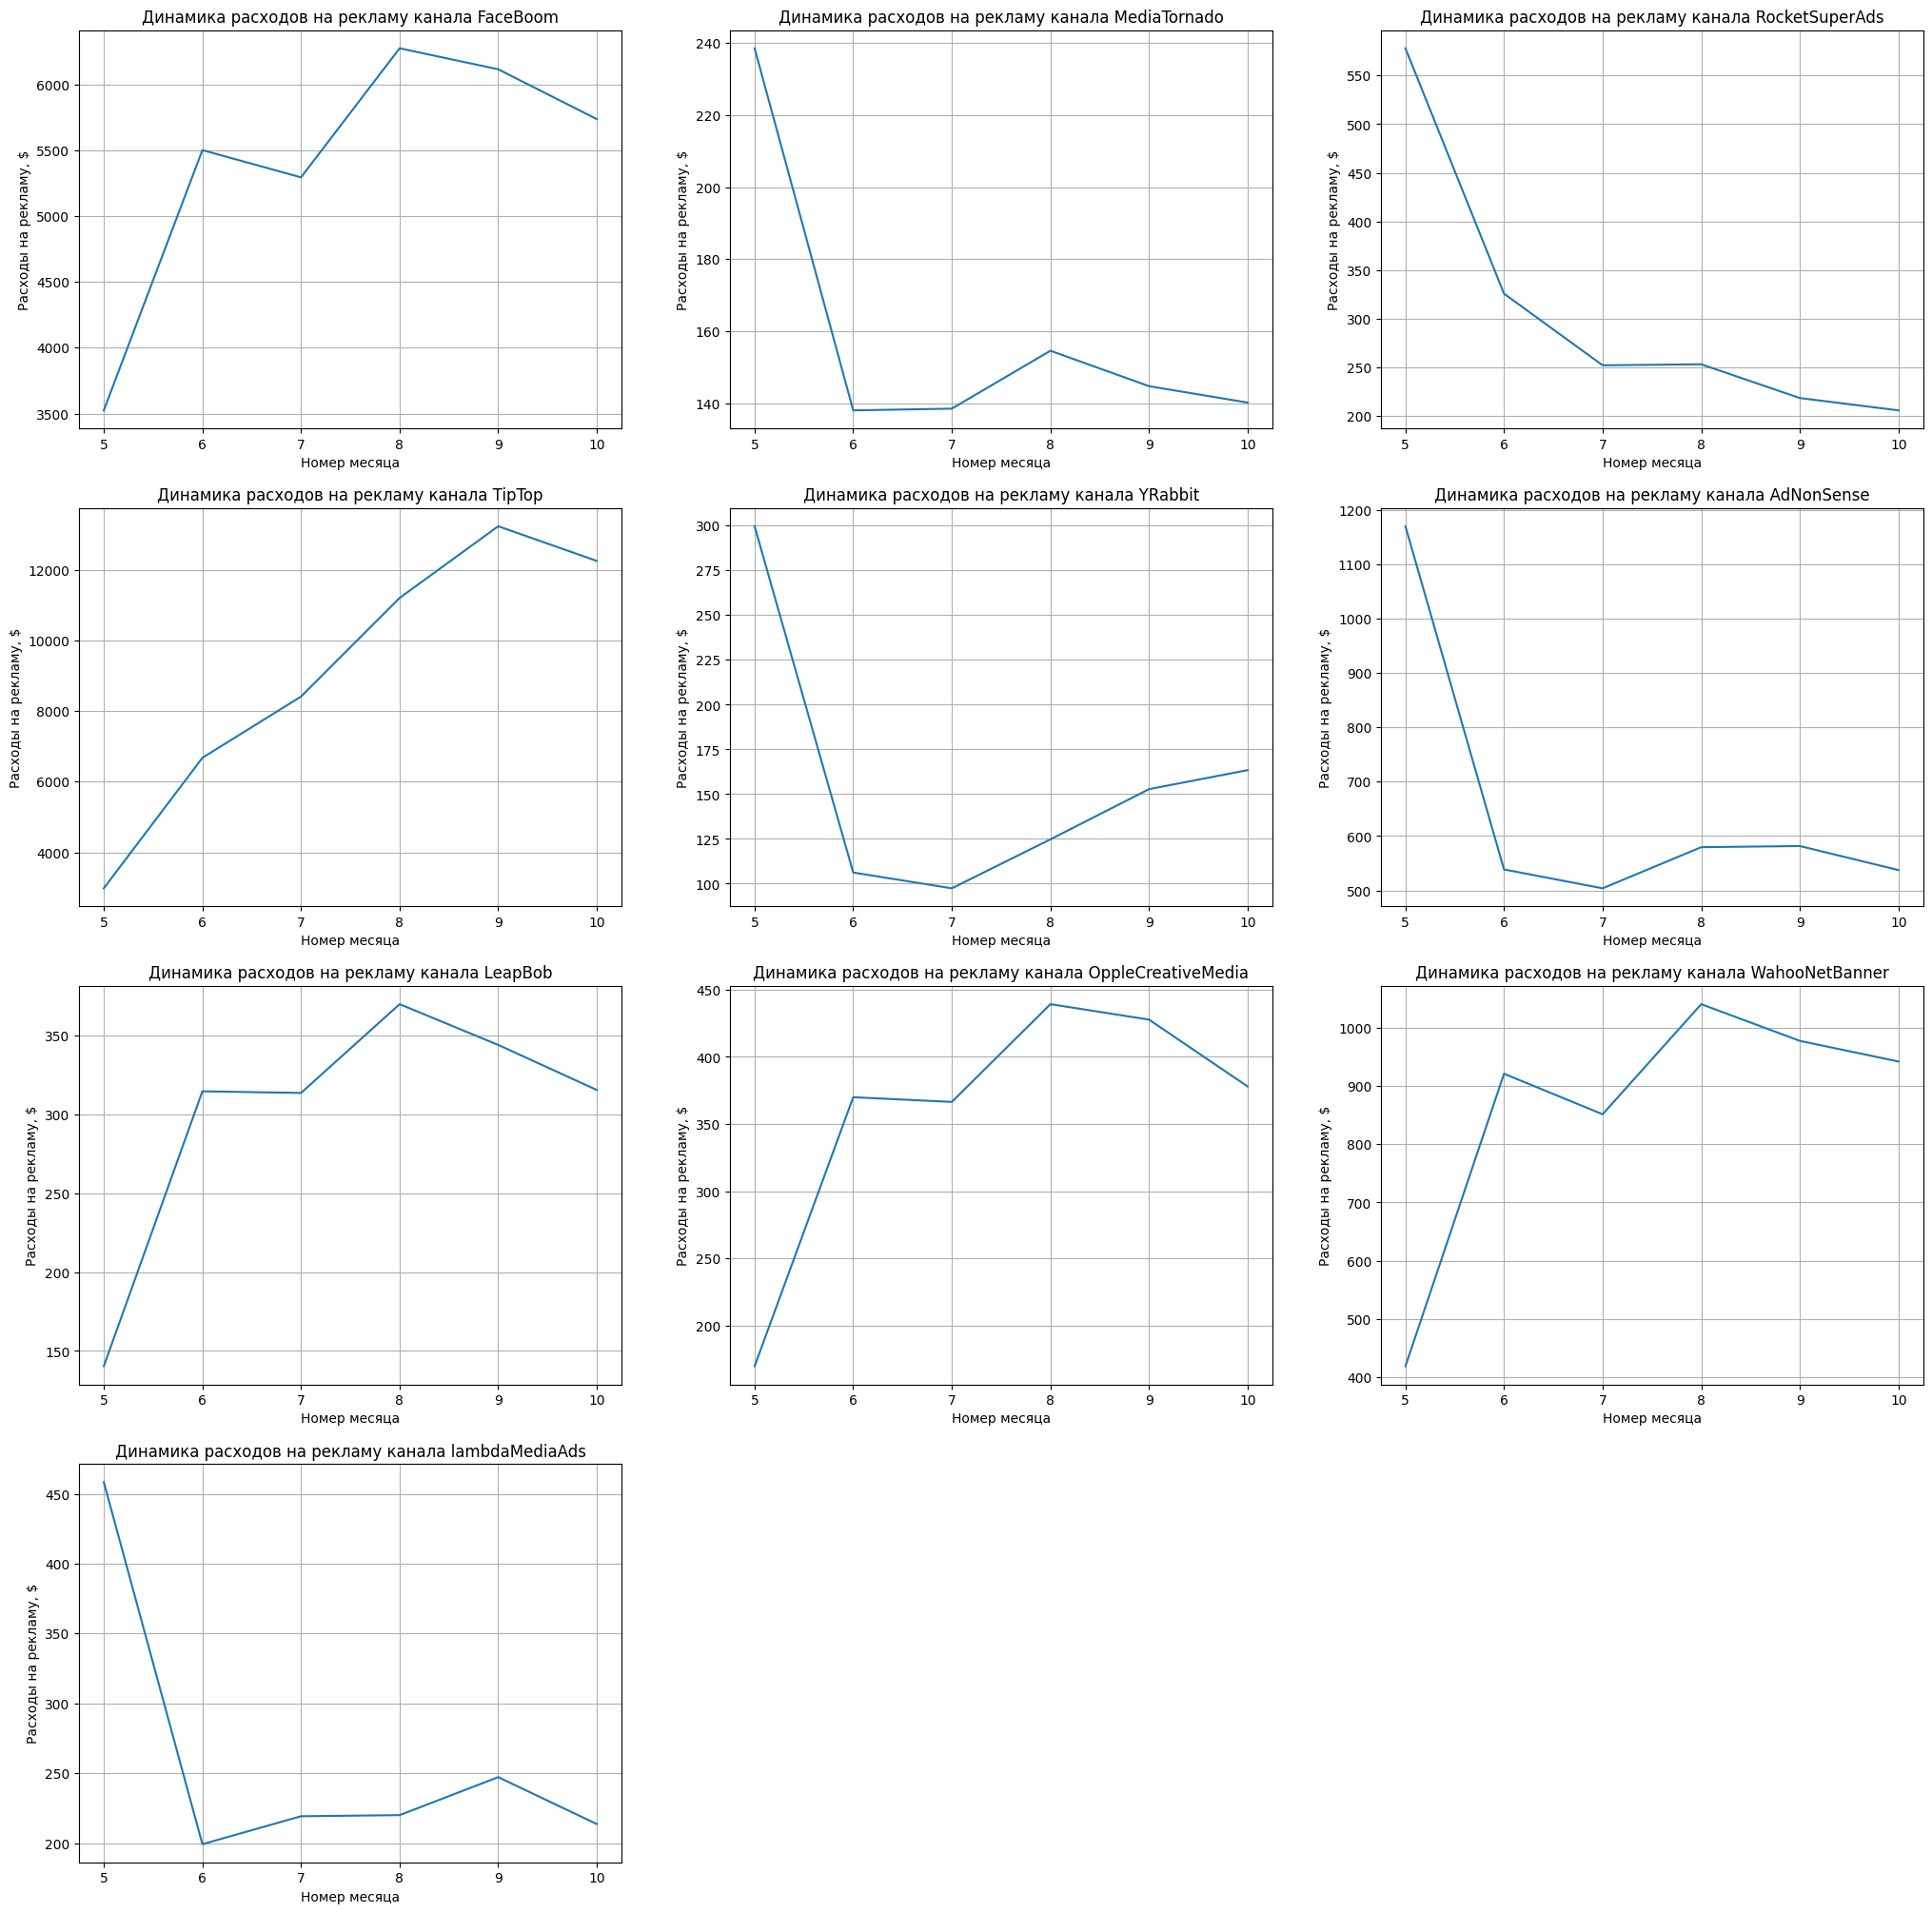

In [58]:
j = 0
plt.figure(figsize=(25, 25))
for channel_name in costs['channel'].unique():
    costs_history = (costs[costs['channel'] == channel_name]
                     [['dt','costs']]
                    )
    costs_history['dt'] = pd.to_datetime(costs_history['dt']) 
    costs_history['dt'] = costs_history['dt'].dt.month
    costs_history = costs_history.groupby('dt')['costs'].sum().reset_index()
    j = j + 1
    ax_j = plt.subplot(4, 3, j)
    figure = costs_history.plot(x='dt',y='costs',grid=True,legend=False,ax=ax_j);
    figure.set(xlabel='Номер месяца',
               ylabel='Расходы на рекламу, $',
               title='Динамика расходов на рекламу канала {}'.format(channel_name));   

**Каналы можно разделить на 2 группы по характеру динамики изменения расходов на рекламу по месяцам:**
* **1 группа `-` с тенденцией на увеличение расходов. В неё входят каналы:**
  * **TipTop;**
  * **FaceBoom;**
  * **LeapBob;**
  * **OppleCreativeMedia;**
  * **WahooNetBanner.**
* **2 группа `-` с тенденцией на уменьшение расходов. В неё входят каналы:** 
  * **MediaTornado;**
  * **YRabbit;**
  * **lambdaMediaAds;**
  * **RocketSuperAds;**
  * **AdNonSense.**

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [59]:
(profiles
 .groupby('channel')['acquisition_cost']
 .agg('mean')
 .reset_index()
 .rename(columns={'channel':'Канал','acquisition_cost':'Средняя стоимость привлечения, $'})
 .sort_values(by='Средняя стоимость привлечения, $',ascending=False)
 .reset_index(drop=True)
 .drop(labels = [10],axis = 0)
)

Канал  Средняя стоимость привлечения, $
0              TipTop                          2.799003
1            FaceBoom                          1.113286
2          AdNonSense                          1.008054
3      lambdaMediaAds                          0.724802
4      WahooNetBanner                          0.602245
5      RocketSuperAds                          0.412095
6  OppleCreativeMedia                          0.250000
7             YRabbit                          0.218975
8        MediaTornado                          0.218717
9             LeapBob                          0.210172

**Выделяется средняя стоимость привлечения пользователей из источника `TipTop`. Она самая большая и составляет почти 3 доллара. Средняя стоимость привлечения пользователей из источников `FaceBoom` и `AdNonSense` приблизительно одинаковая и равна 1-ому доллару. Самые показательные источники: `YRabbit`,`MediaTornado` и `LeapBob` с САС, равным 20 центов.** 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Проанализируем окупаемость рекламы в целом c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Анализ будем проводить для момента, равного максимальной дате привлечения пользователей `-` 27 октября 2019 года. В соответствии с бизнес планом горизонт анализа нужно выбрать равным 14 дням.

Получим LTV и ROI с помощью функции `get_ltv()`.

In [60]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles[profiles['channel']!='organic'],
    purchases=orders,
    observation_date=max_date,
    horizon_days=14
)

Посторим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

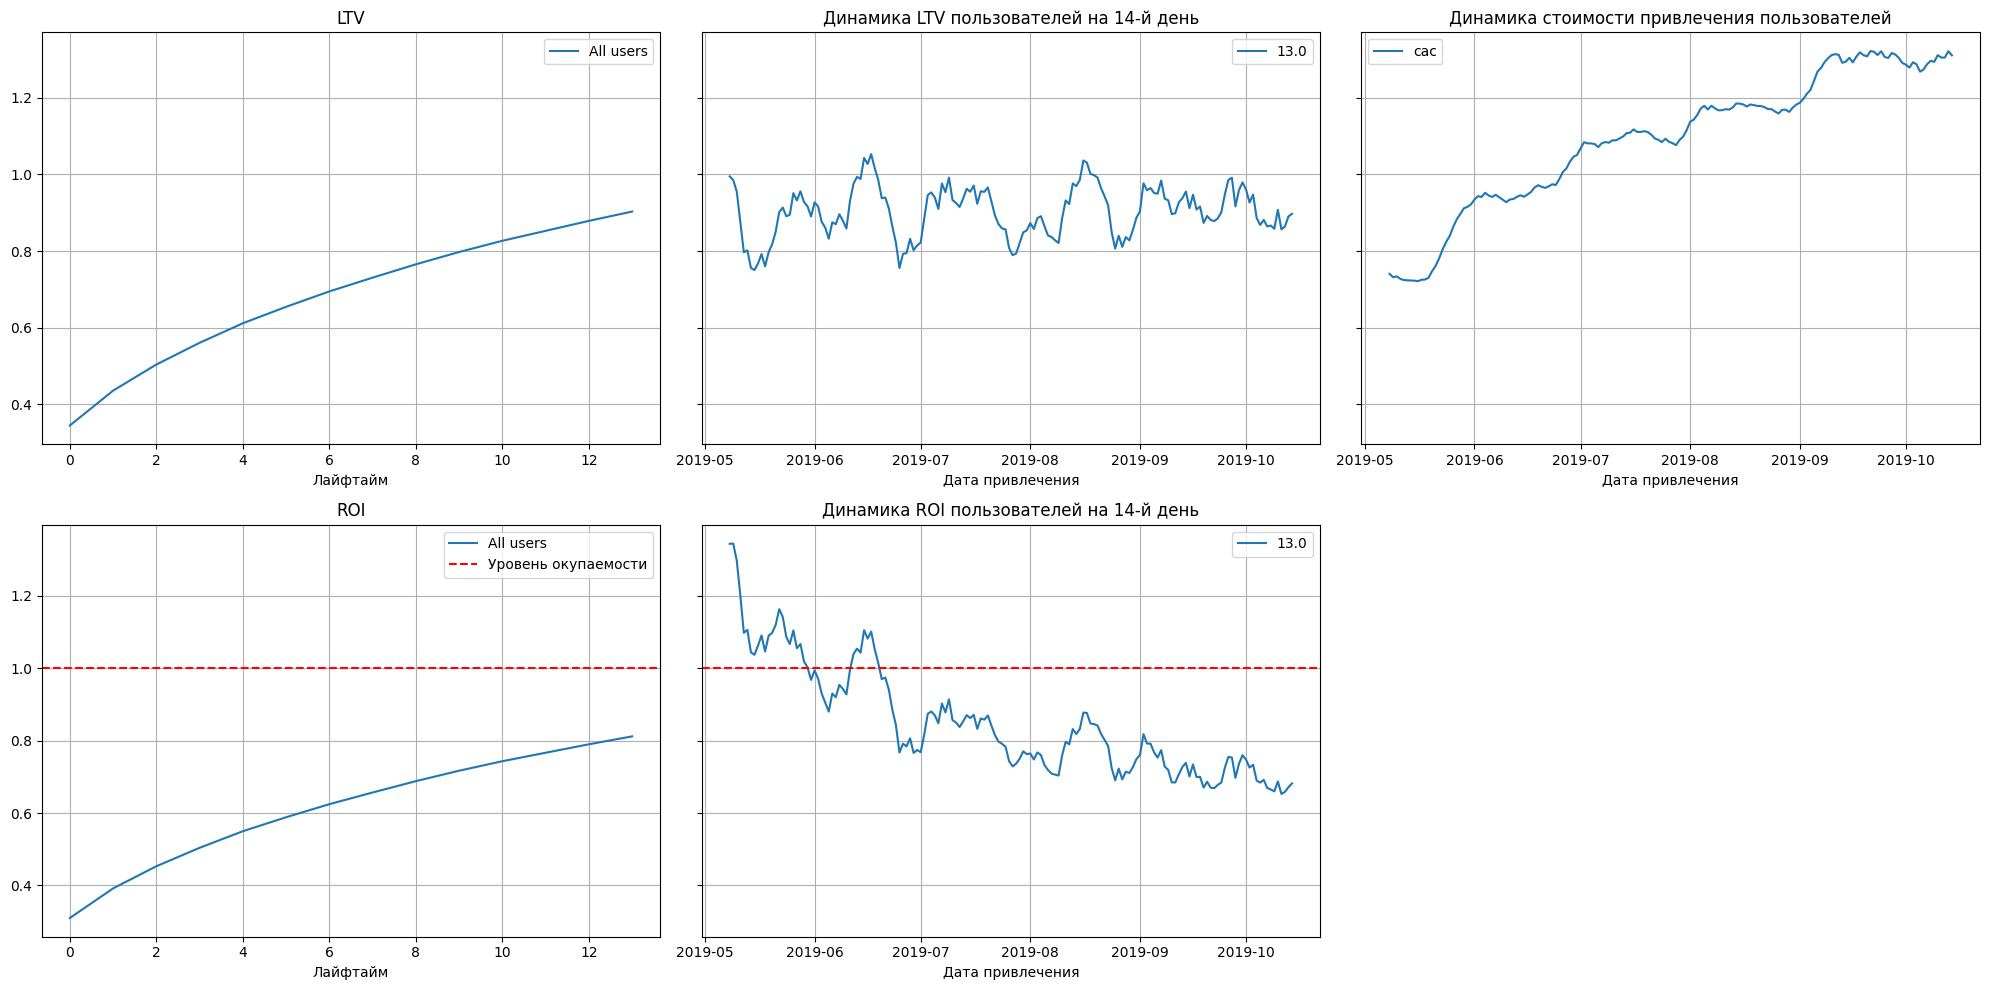

In [61]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=8)

**По графику динамики ROI пользователей на вторую неделю привлечения видно, что в течение всего мая и некоторой части июня реклама в целом окупалась. После 20 июня окупаемость начала ухудшаться и была стабильно ниже 100%, что свидетельствует о том, что бизнес план перестал работать (пользователи перестали окупаться в течение 2 недель после привлечения). Это связано в первую очередь с тем, что LTV привлечённых пользователей на 14 день после 20 июня изменяется в небольших пределах от 80 до 100 центов, а стоимость привлечения новых пользователей увеличивается от 100 до 140 центов, привышая LTV. По графикам LTV и ROI видно, что в среднем LTV за 2 недели возрастает до 90 центов, а ROI возрастает только до 80%, не превышая уровень окупаемости.**

Проверим конверсию пользователей и динамику её изменения.

Рассчитаем конверсию с помощью функции `get_conversion()`.

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles[profiles['channel']!='organic'],
    purchases=orders,
    observation_date=max_date,
    horizon_days=14
)

Построим график конверсии и график динамики её изменения.

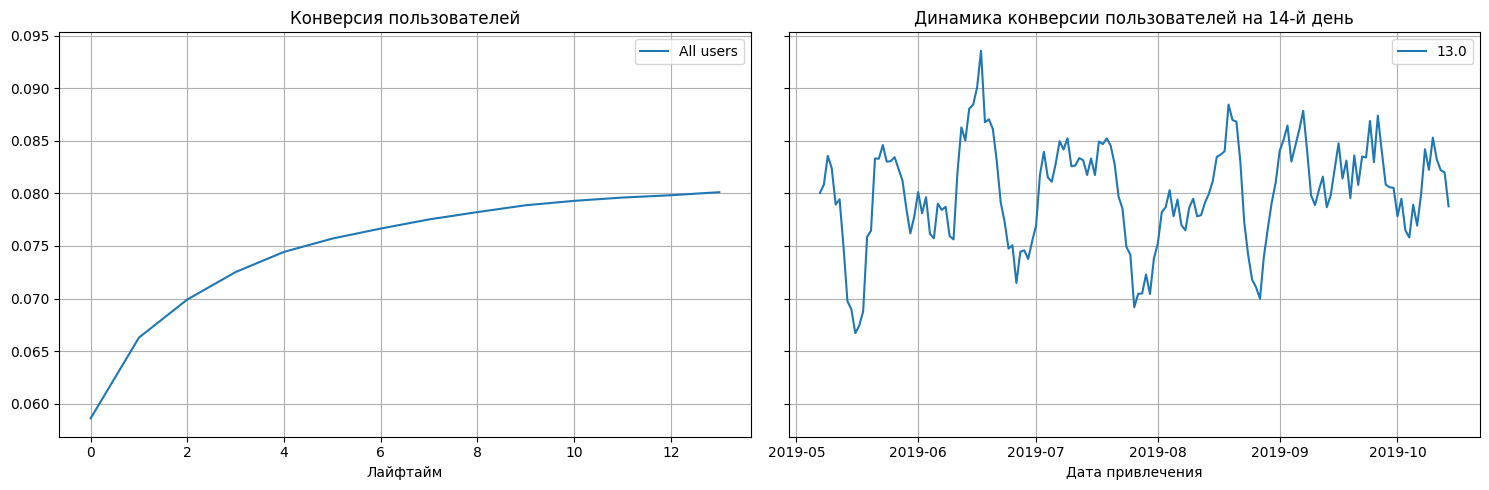

In [63]:
plot_conversion(conversion=conversion_grouped, conversion_history=conversion_history, horizon=14, window=7)

**Конверсия пользователей к 14 дню в среднем возрастает до 8%. В убыточный для компании период конверсия пользователей на 2 неделю колеблется от 7 до 9%. Конверсия пользователей на 14 день в убыточный для компании период изменяется незначительно и не снижается слижком сильно, чтобы это могло повлиять на убытки компании.**

Проверим удержание пользователей и динамику его изменения.

Рассчитаем удержание с помощью функции `get_retention()`.

In [64]:
retention_raw, retention, retention_history  = get_retention(
    profiles=profiles[profiles['channel']!='organic'],
    sessions=visits,
    observation_date=max_date,
    horizon_days=14    
)

Построим график удержания и график динамики его изменения.

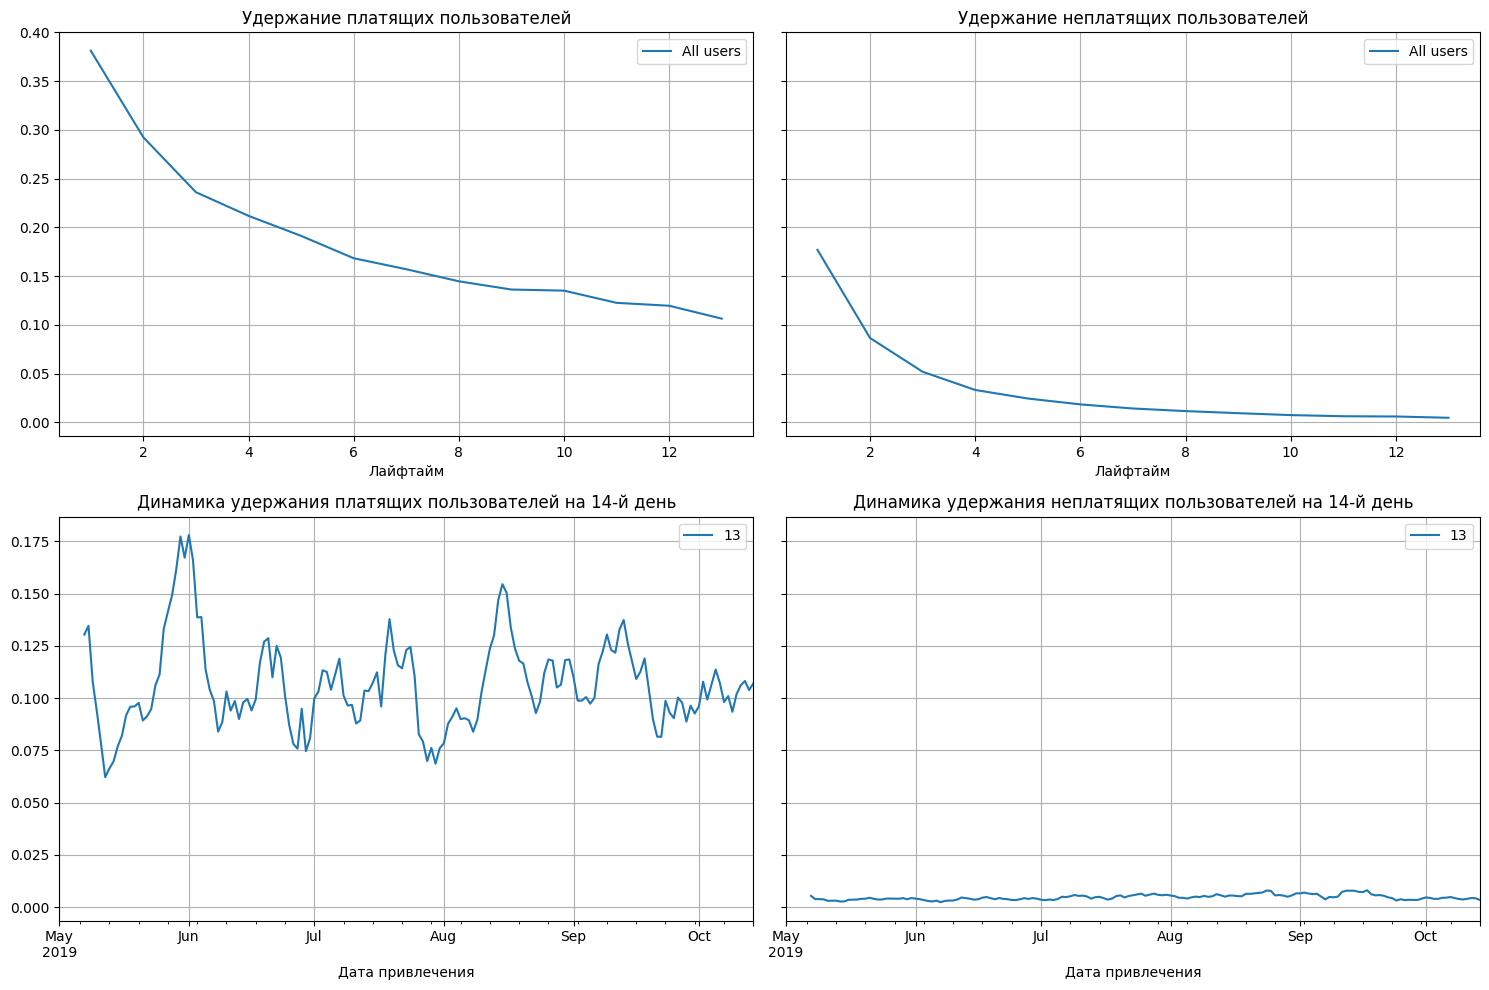

In [65]:
plot_retention(retention=retention, 
               retention_history=retention_history, 
               horizon=14, 
               window=7)

**Удержание платящих пользователей выше, чем удержание неплатящих. После 20 июня удержание платящих пользователей на 2 неделю меняется в небольших пределах и примерно равно 12%. Показатель удержания достаточно низкий.**

**В целом реклама не окупается из-за увеличивающейся стоимости привлечения пользователей, не приводящей к увеличению LTV.**

Проанализируем окупаемость рекламы с разбивкой по устройствам.

Постройм графики LTV и ROI, а также графики динамики LTV, CAC и ROI для каждого из устройств.

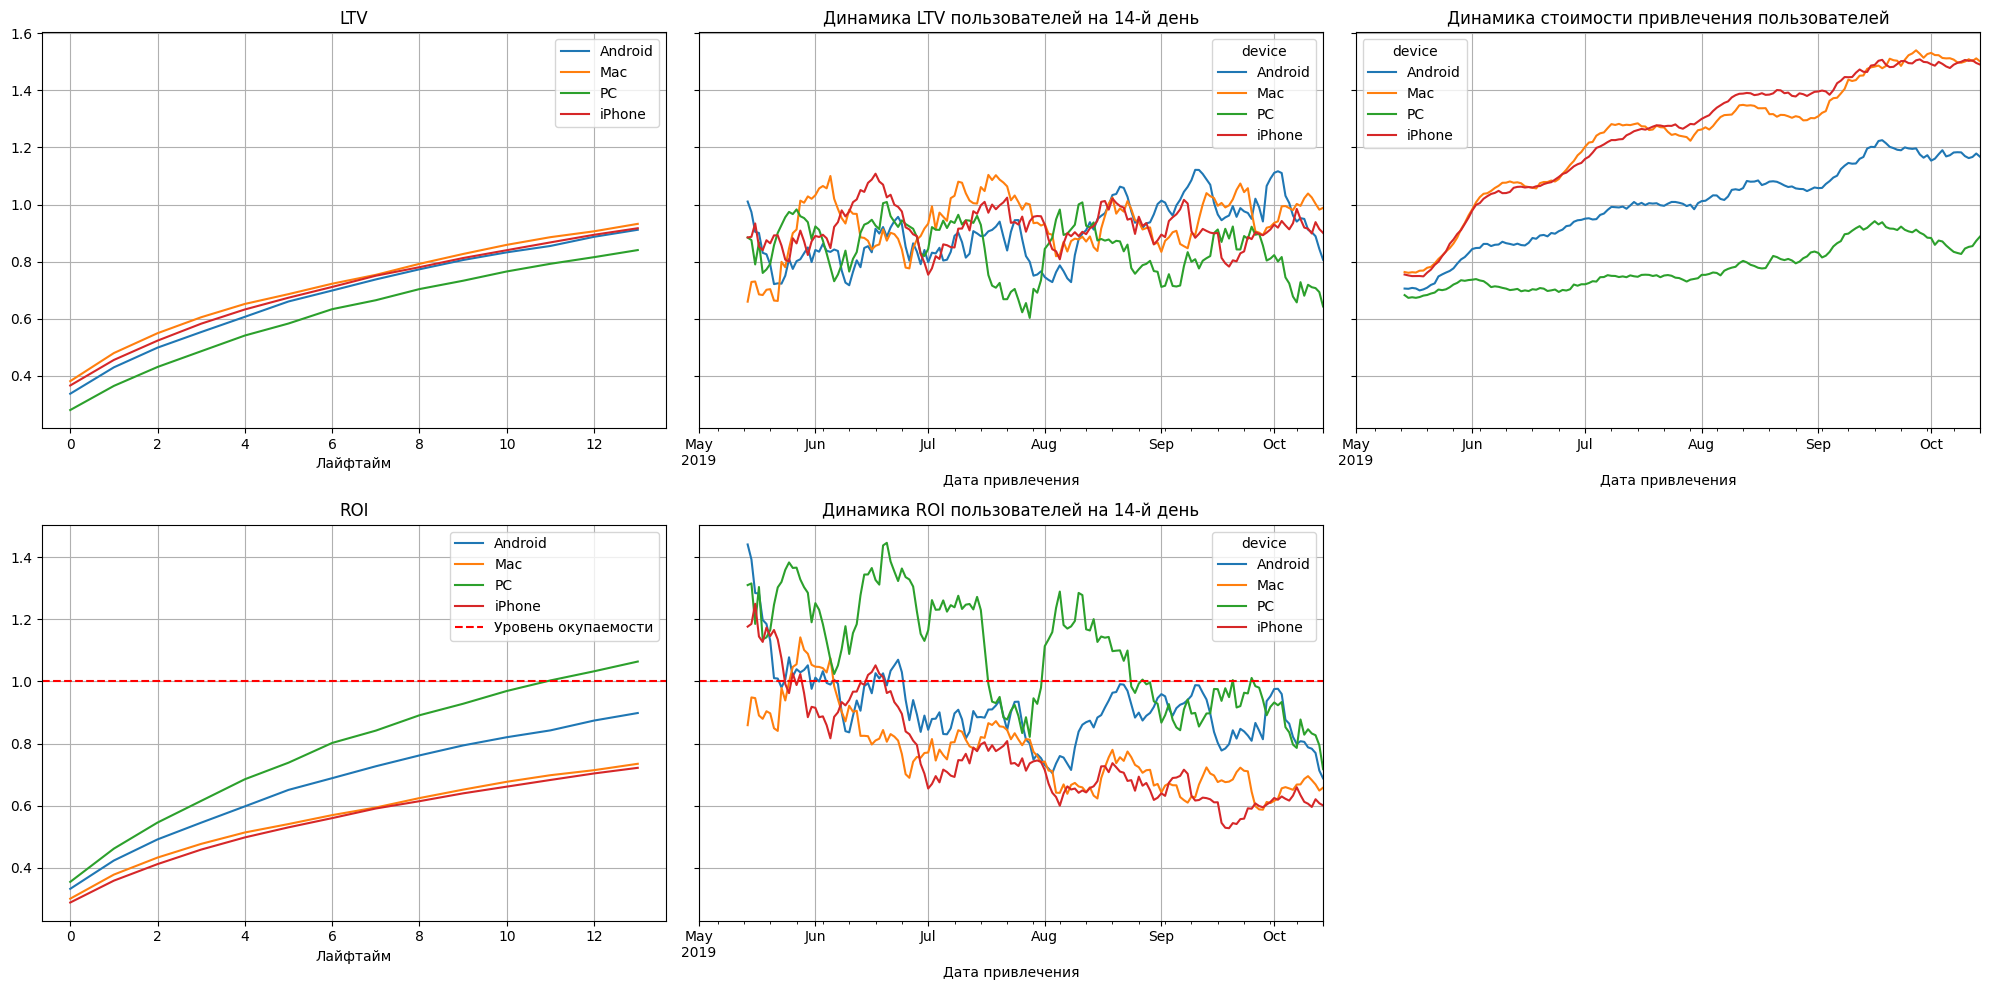

In [66]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles[profiles['channel']!='organic'],
    purchases=orders,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['device']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14)

**Из графиков можно сделать следующие выводы:**
* **LTV у пользователей устройств `Android`, `Mac` и `iPhone` отличаются незначительно. LTV пользователей `PC` наименьший;**
* **Стоимость привлечения пользователей всех устройств увеличивается, но оказывается наименьшей для пользователей `PC`;**
* **Окупаются к концу второй недели только пользователи устройства `PC`. Пользователи `PC` окупаются лучше, даже не смотря на то, что LTV этих пользователей наименьший. Это связано с тем, что стоимость их привлечения значительно ниже стоимости привлечения пользователей других устройств. Стоит заметить, что начиная с конца августа даже эти пользователи перестали окупаться из-за сильно возросшего CAC по сравнению с LTV.**

Проанализируем окупаемость рекламы с разбивкой по странам.

Постройм графики LTV и ROI, а также графики динамики LTV, CAC и ROI для каждой из стран.

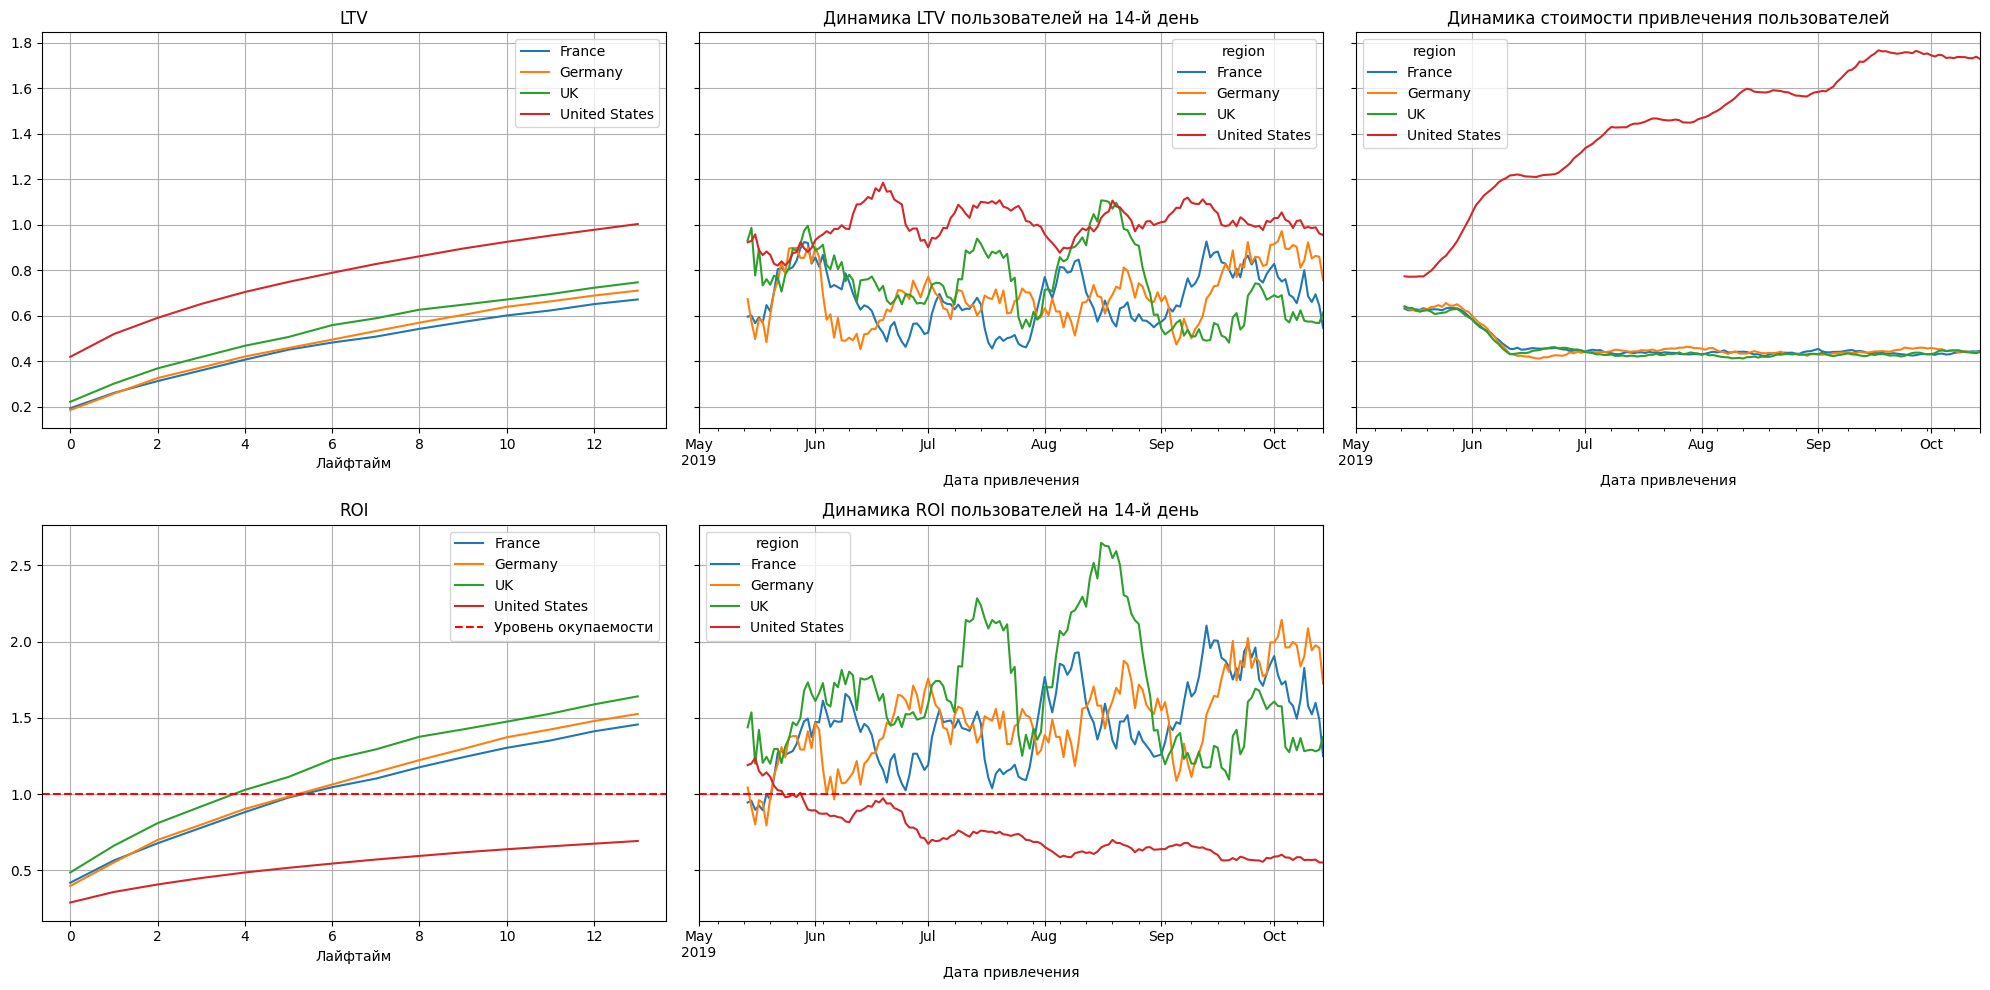

In [67]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles[profiles['channel']!='organic'],
    purchases=orders,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['region']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14)

**Из графиков можно сделать следующие выводы:**
* **LTV у пользователей из Америки наибольший. LTV пользователей из других стран ниже и приблизительно одинаковый для них.**
* **Стомость привлечения пользователей из Франции, Великобритании и Германии почти не отличается в динамике и значительно ниже стоимости привлечения пользователей из Америки, которая заметно увеличивается со временем.**
* **Не окупаются к концу второй недели только пользователи из Америки, хотя стоит заметить, что в конце мая окупались и эти пользователи из-за невысокой стоимости их привлечения по сравнению с их LTV. Со временем стоимость их привлечения выросла так сильно, что даже их наибольший из всех LTV перестал выводить ROI на уровень выше единицы.**

Проанализируем окупаемость рекламы с разбивкой по каналам.

Постройм графики LTV и ROI, а также графики динамики LTV, CAC и ROI для каждого из каналов.

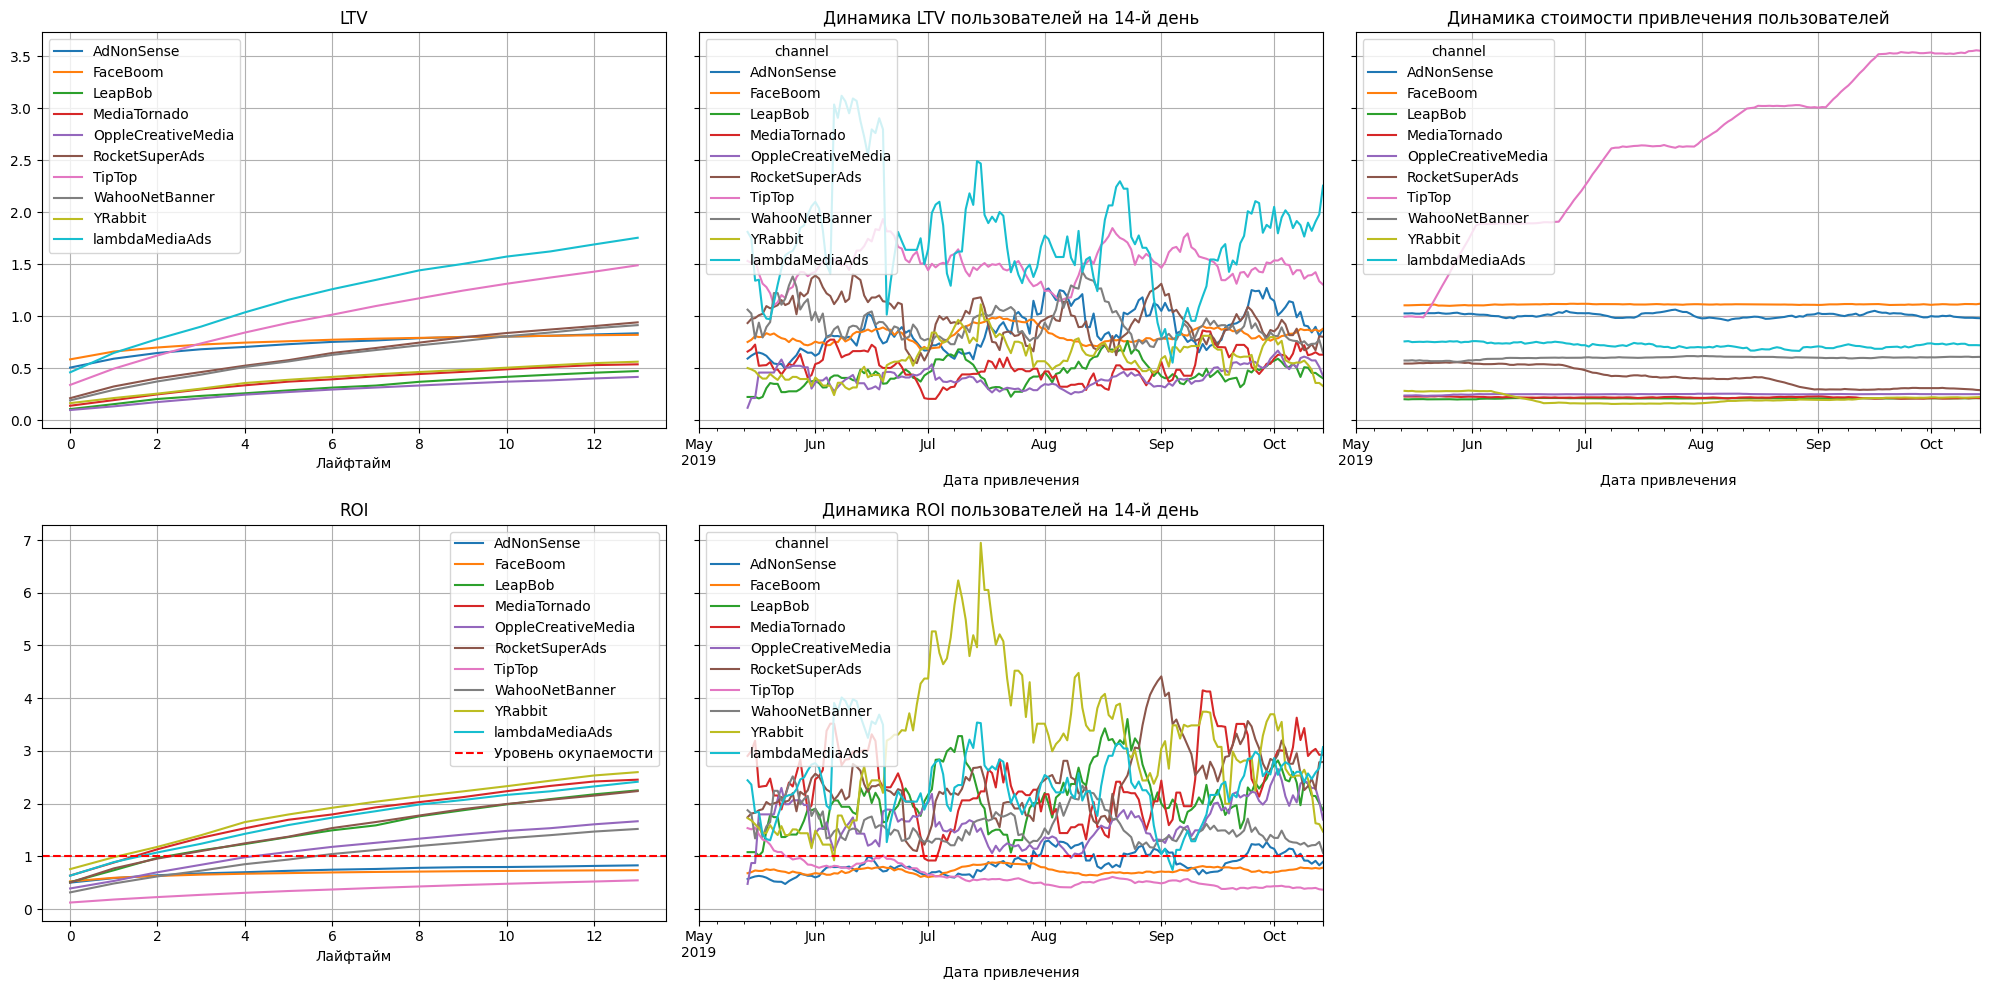

In [68]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles=profiles[profiles['channel']!='organic'],
    purchases=orders,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['channel']
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14)

**Не окупаются к концу второй недели только три канала: `TipTop`, `FaceBoom` и `AdNonSense`.**
**Причины не окупаемости для каждого канала:**
* **`TipTop`: не плохой LTV затмевается крайне высоким показателем CAC, который со временем становится всё больше и больше.**
* **`FaceBoom`: стабильный показатель CAC оказывается всё время больше, чем LTV пользователей, привлечённых этим каналом.**
* **`AdNonSense`: высокая стоимость привлечения пользователей по сравнению с LTV.**

Проанализируем конверсию по устройствам.

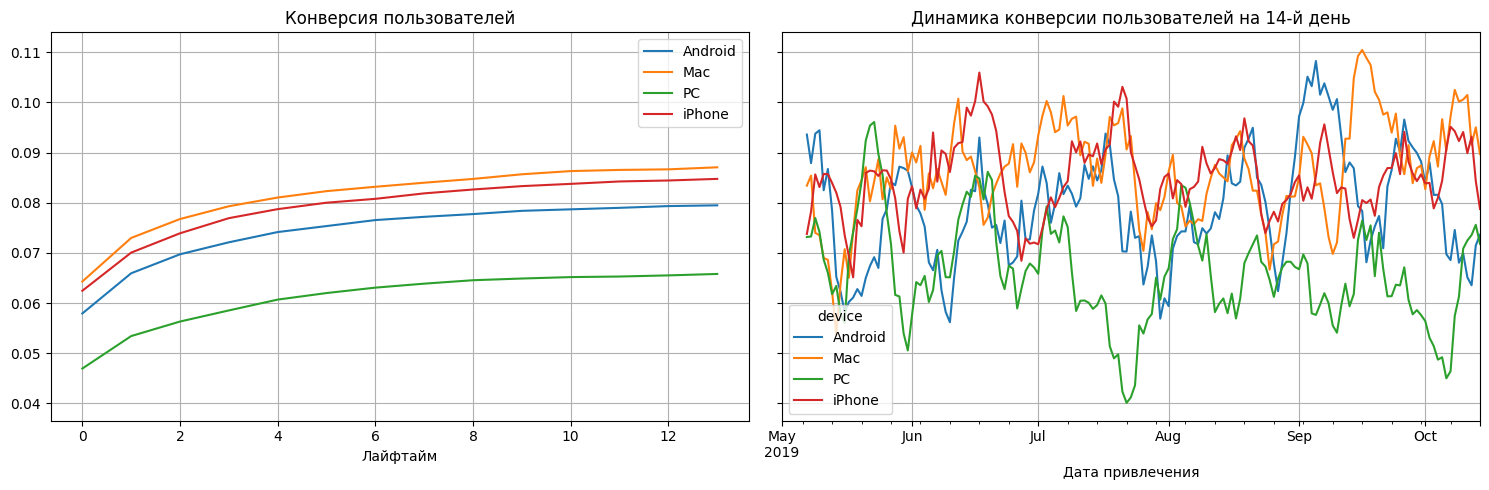

In [69]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles[profiles['channel']!='organic'],
    purchases=orders,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['device'],
)
plot_conversion(conversion=conversion_grouped, conversion_history=conversion_history, horizon=14, window=7)

Удивительно, но пользователи PC конвертируются хуже всех, когда пользователи остальных устройств показывают приблизительно одинаковые результаты по конверсии на 2 неделю.

Проанализируем конверсию по странам.

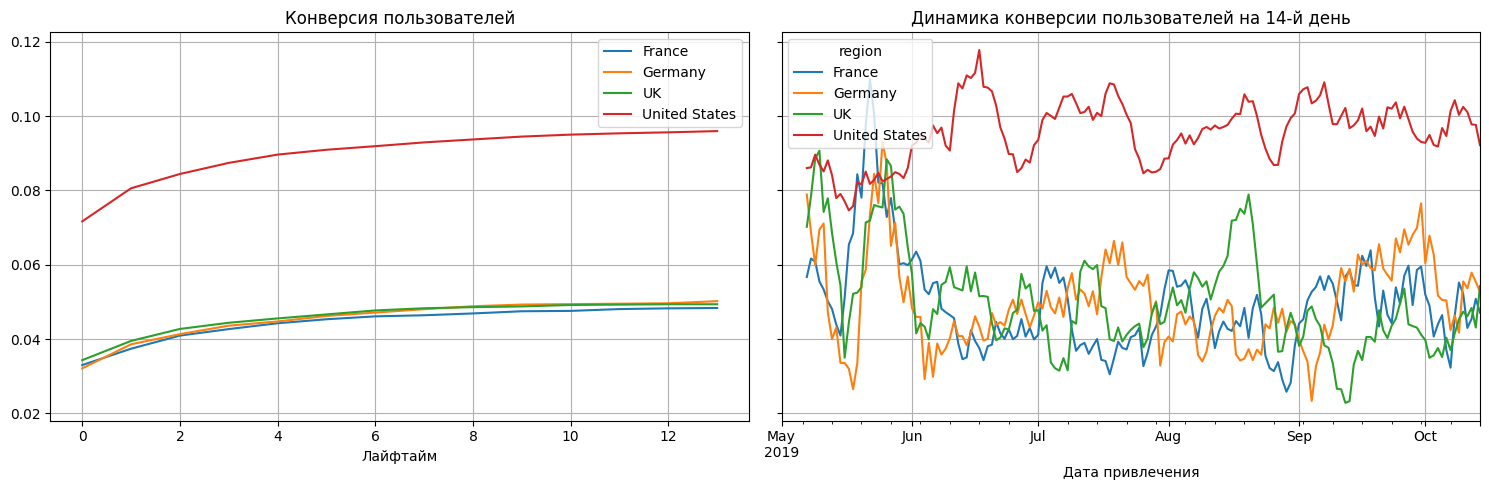

In [70]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles[profiles['channel']!='organic'],
    purchases=orders,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['region'],
)
plot_conversion(conversion=conversion_grouped, conversion_history=conversion_history, horizon=14, window=7)

И опять странности, конверсия пользователей США очень высокая. Конверсия пользователей из других стран одинакова, но ниже.

Проанализируем конверсию по каналам.

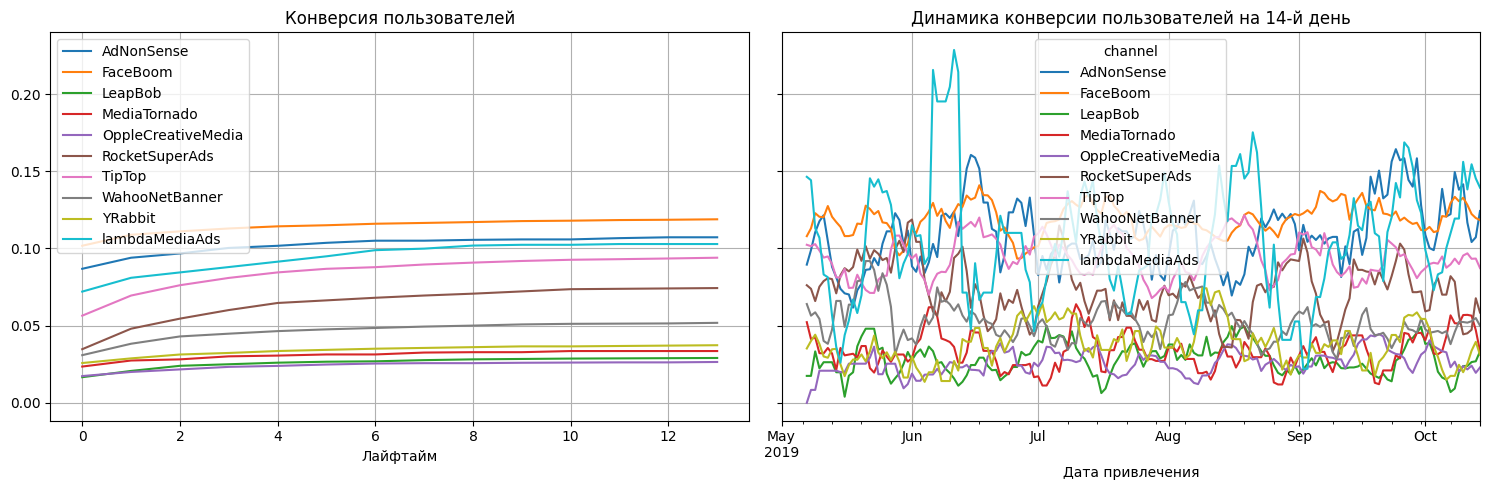

In [71]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles=profiles[profiles['channel']!='organic'],
    purchases=orders,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['channel'],
)
plot_conversion(conversion=conversion_grouped, conversion_history=conversion_history, horizon=14, window=7)

Лучше всего конвертируются пользователи с канала FaceBoom, AdNonSense и lambdaMediaAds.

Проанализируем удержание по устройствам.

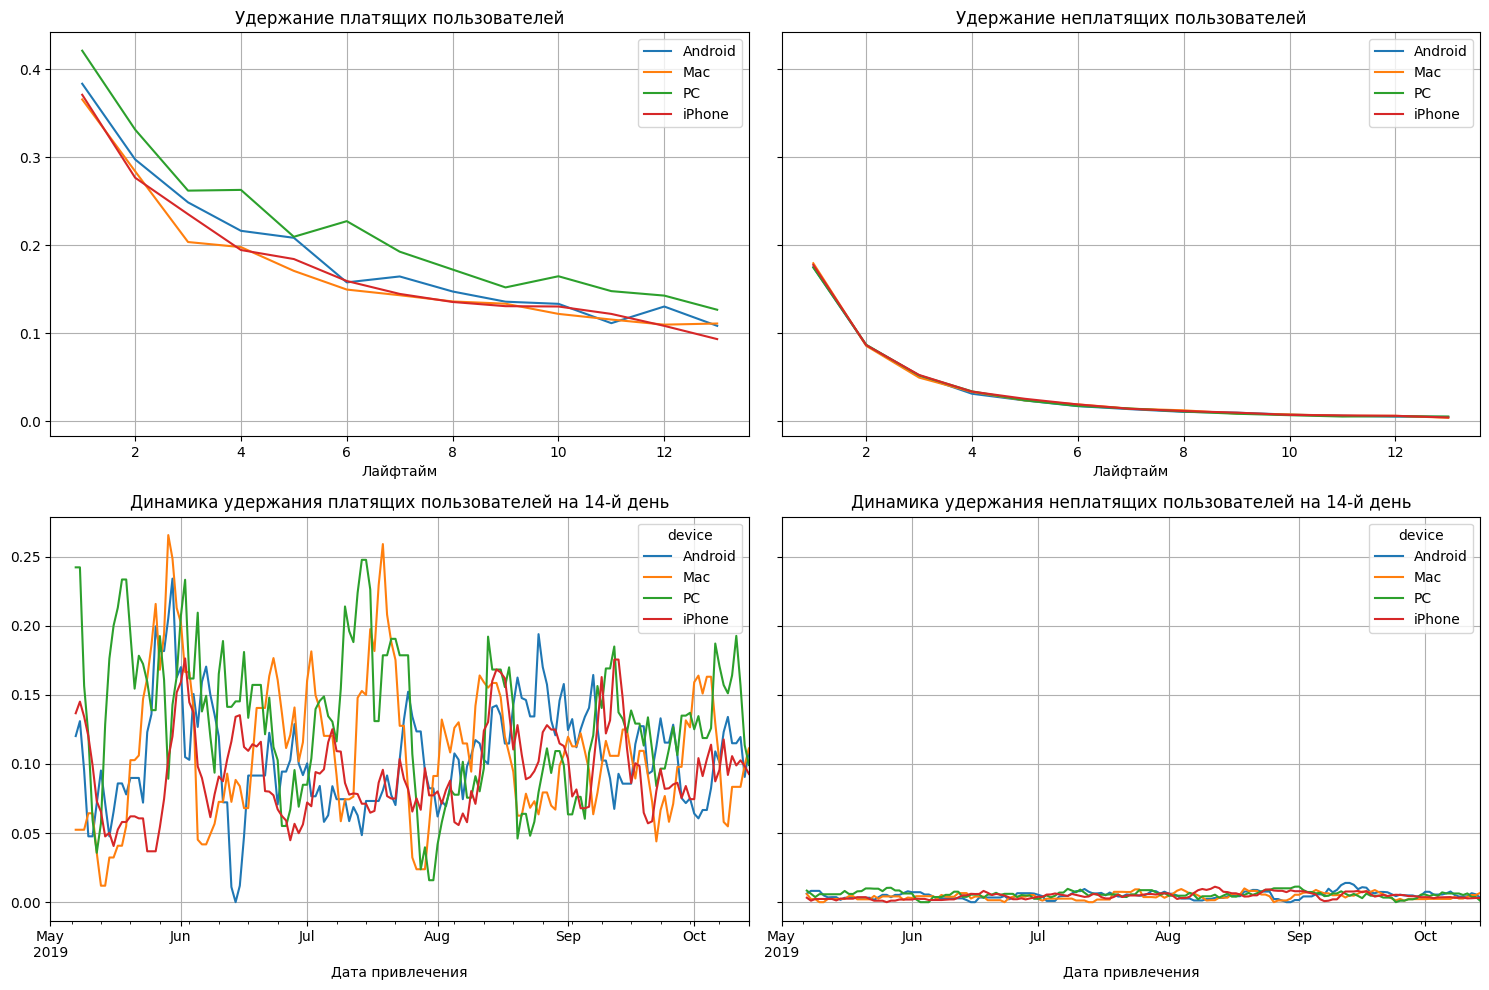

In [72]:
retention_raw, retention, retention_history  = get_retention(
    profiles=profiles[profiles['channel']!='organic'],
    sessions=visits,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['device']
)
plot_retention(retention=retention, retention_history=retention_history, horizon=14, window=7)

Удержание по устройствам низкое к концу 2 недели и никакое из устройсв не выделяется по этому показателю.

Проанализируем удержание по странам.

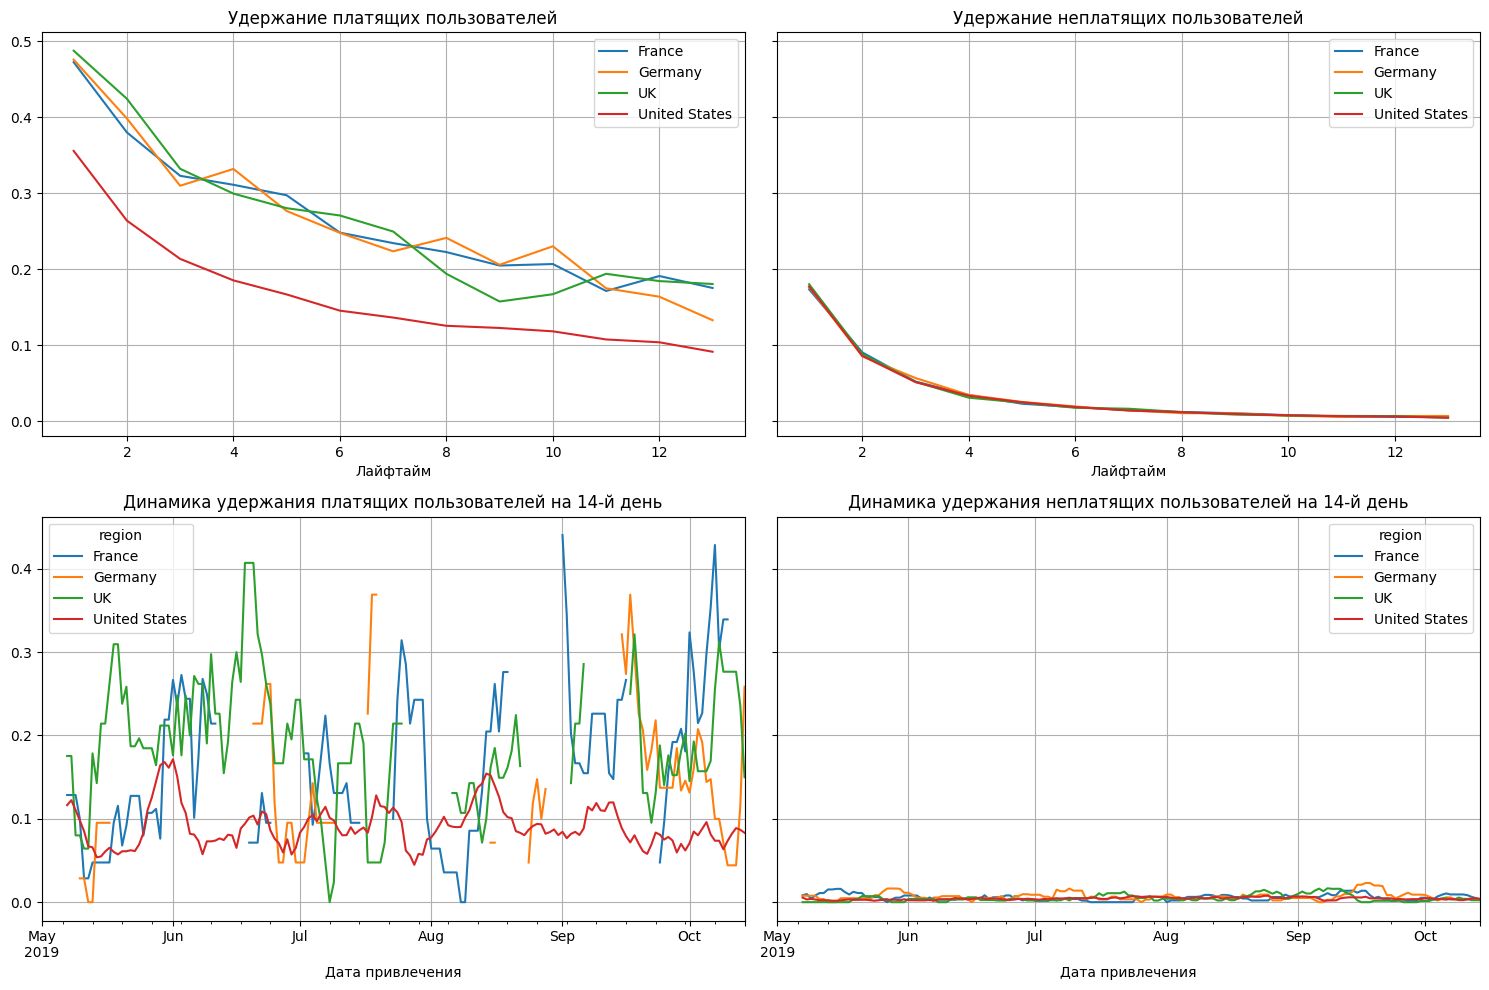

In [73]:
retention_raw, retention, retention_history  = get_retention(
    profiles=profiles[profiles['channel']!='organic'],
    sessions=visits,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['region']
)
plot_retention(retention=retention, retention_history=retention_history, horizon=14, window=7)

У США явные проблемы с показателем удержания.

Проанализируем удержание по каналам.

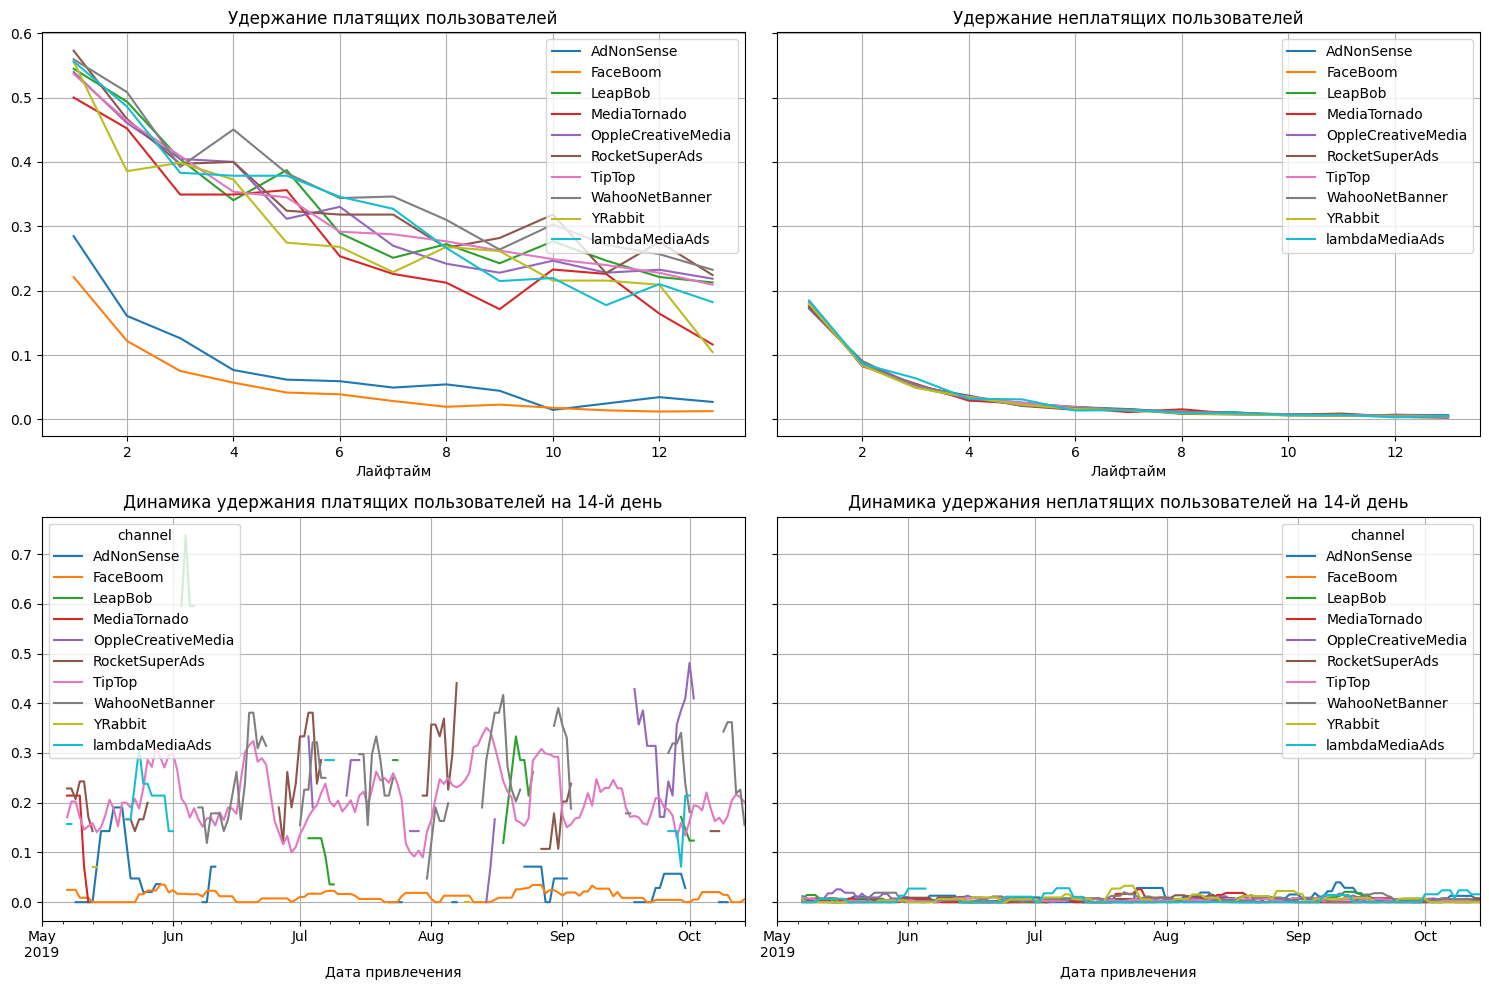

In [74]:
retention_raw, retention, retention_history  = get_retention(
    profiles=profiles[profiles['channel']!='organic'],
    sessions=visits,
    observation_date=max_date,
    horizon_days=14,
    dimensions=['channel']
)
plot_retention(retention=retention, retention_history=retention_history, horizon=14, window=7)

Наихудшие покзатели удержания у пользователей, привлечённых каналами AdNonSense и FaceBoom.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Выводы**
* Причины неэффективности привлечения пользователей:
  * удержание клиентов очень низкое;
  * плохая ориентированность на пользователей устройств `iPhone` и `Mac`;
  * увеличение вложений в каналы `TipTop` и `FaceBoom`;
  * реклама является убыточной в Америке.
* Рекомендации для отдела маркетинга:
  * повысить удержание клиентов путём добавления в приложение бонусов, подарков, акций и скидок;
  * проверить как пользователи устройств `iPhone` и `Mac` работают с приложением на стадии регистрации и оплаты;
  * не распределять рекламный бюджет настолько неравномерно, надеясь только на два канала;
  * повысить низкое удержание пользователей из США и пользователей, привлечённых каналами `AdNonSense` и `FaceBoom`.  